In NHL-goals-by-month analysis, it was seen that there have been couple of times when goal scoring goes up significally between seasons.

That makes wonder, why would that kind of change happen? Rule changes that causes more penalties? Stricter rules to goalie equipment? 

Well, let's see what data tells us, and start by checking how much goal scoring has changed during years:

In [ ]:
import json
import requests
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:

BASE_URL = "https://statsapi.web.nhl.com"
SEASONS_LINK = "/api/v1/seasons"
SCHEDULE_LINK = "/api/v1/schedule"
GAMETYPE_REGULATION = "gameType=R"
SEASON = "season="
START_DATE = "startDate="
END_DATE = "endDate="
YEARS_QTY = 30


#season_data = pd.DataFrame(columns=['season', 'gamePk', 'game_goals'])
season_data = pd.DataFrame({
    'season': pd.Series(dtype='int'),
    'gamePk': pd.Series(dtype='int'),
    'game_goals': pd.Series(dtype='int')})
seasons = []

resp = requests.get("{}{}".format(BASE_URL,SEASONS_LINK))
seasons_all = json.loads(resp.text)

for i in range(YEARS_QTY+1, 1, -1):
  seasons.append({'seasonId': seasons_all['seasons'][-i]['seasonId']})

print(seasons)

for season in seasons:
  resp = requests.get("{}{}?{}&{}{}".format(BASE_URL,SCHEDULE_LINK, GAMETYPE_REGULATION, SEASON, season['seasonId']))
  games_season = json.loads(resp.text)

  df = pd.json_normalize(
      data = games_season['dates'], 
      record_path= ['games'],
      meta='score',
      errors='ignore'
      )
  
  df = df.assign(game_goals = lambda x: (x['teams.away.score'] + x['teams.home.score']))
  df = df[['season', 'gamePk', 'game_goals']]
  
  
  season_data = season_data.append(df)
  

print(season_data)

[{'seasonId': '19901991'}, {'seasonId': '19911992'}, {'seasonId': '19921993'}, {'seasonId': '19931994'}, {'seasonId': '19941995'}, {'seasonId': '19951996'}, {'seasonId': '19961997'}, {'seasonId': '19971998'}, {'seasonId': '19981999'}, {'seasonId': '19992000'}, {'seasonId': '20002001'}, {'seasonId': '20012002'}, {'seasonId': '20022003'}, {'seasonId': '20032004'}, {'seasonId': '20052006'}, {'seasonId': '20062007'}, {'seasonId': '20072008'}, {'seasonId': '20082009'}, {'seasonId': '20092010'}, {'seasonId': '20102011'}, {'seasonId': '20112012'}, {'seasonId': '20122013'}, {'seasonId': '20132014'}, {'seasonId': '20142015'}, {'seasonId': '20152016'}, {'seasonId': '20162017'}, {'seasonId': '20172018'}, {'seasonId': '20182019'}, {'seasonId': '20192020'}, {'seasonId': '20202021'}]


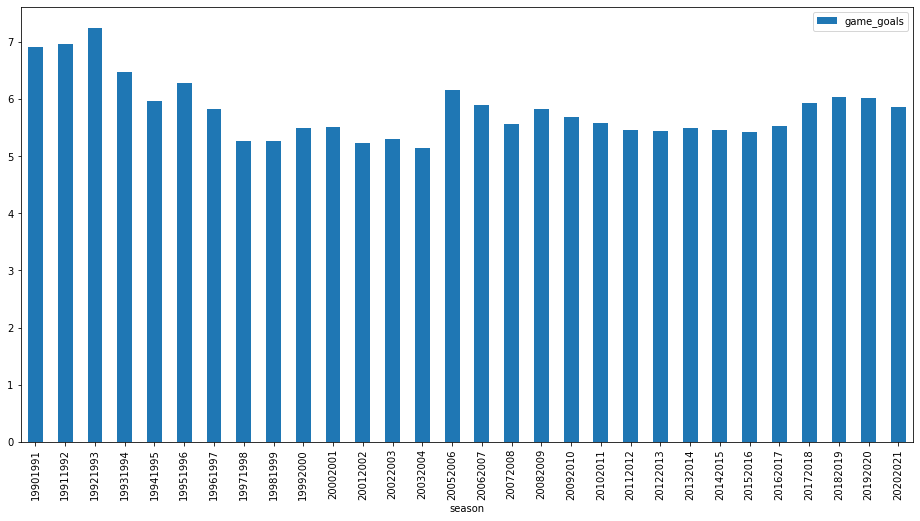

In [ ]:
goals_avg_per_season = season_data[['season', 'game_goals']].groupby('season').mean().reset_index()
goals_avg_per_season.plot(y='game_goals', x='season', kind = 'bar', figsize = [16,8])
#print(goals_avg_per_season)
plt.show()

So couple of things pop up watching chart above:

###Dead puck era
You might have heard of dead puck era during 90's. Based on the scoring, it started in 1997-1998, and ended after 2003-2004. Although the scoring really decreased for 97-98 season, seems that scoring started to decline after 1992-1993 season. Let's see the rule changes between years 1993 and 1997 that might have had some impact on scoring:
- 1993: The maximum height at which a goal can be scored is established at the cross bar.
- 1994: Any severe check from behind risks a major penalty and game misconduct.
- 1995: I didn't find any official source on this, but based on several sources (such as old newspapers), in 1995 league implemented "anti-trap rule" so that it was not allowed to obstruct the attacking player in neutral zone. But this should lead to increased scoring, not decreasing. Right?
- 1996: Every offensive player must exit the zone before the puck is ragged back in.

Of those four rule changes, three should have actually increasing effect on scoring. Only the offside rule included in 1996 pops out as a change that might have had decreasing impact.

So it seems that the reasons behind low scoring are not related to rule changes. If I had to guess, maybe it was just combination of goalies getting better and teams were focusing more on structured defense.

###2005-2006 season
This one seems pretty obvious. Before this season there was lots of rules changed related to attacking zone size, two-line pass, line change after icing the puck etc.

So can we see how these rule changes have impacted to the numbers? For that, rule changes need to be analysed individually. Let's pick four of them:

- Rink dimensions
  1. The size of neutral zone between attacking zones was reduced from 54' to 50', meaning that the size of attacking zone was increased by 2' (~1.2m)
   - This, most likely should have impact on time spent on attacking zone. Unfortunately NHL does not provide this information, so we would have to turn on external sources. At least I was not able to find any source where to get attacking zone time data since ~2000-2001 season to have some even decent sample size on before and after rule change
  2. Goal line was moved 2' (~1.2m) closer to the end boards, meaning that more space between goal and blue line, and less behind the net. Since the blue line was also moved, the length of the area between goal and blue line was increased to ~2.4m in total, meaning that there is a lot more space in the end zones. Some things come to mind that could be impacted by this:
    -  More area in the middle of attacking zone --> More goals scored from this position? But as mentioned in attacking zone time data, there is not much any reliable data sources for this
    - Ideal attributes of defenders. Although it is important to have some toughness/physicality in own end, most likely this caused that skating became way more important part for defensemans. Maybe this led to that instead of favoring "old school"/tough defenders, teams started to favor more skilled players? If so, most likely **there should've been some increase in defenseman points**. Luckily, there should be data for this
  3. "Trapezoid rule", which refers to the marked area that goalies are not allowed to pass when they are behind the net
    - This one can be pretty tricky in data point of view. This caused that goalies are not allowed to pick "dump pucks" from corners, which should lead attacking team having better change of getting the puck and therefore, well, score more goals. It would be interesting to see how much goalies used to get the puck from corners, but maybe that kind of data is available in future when positioning systems are taken into use :) 
    - Crossing the "trapezoid area" leads to Delaying the game -penalty, so **goalie penalty data** would be interesting to check out
    - **Maybe there is also a slight decrease in goalie assists**, when the playing with puck is limited. 

- Fewer stoppages to increase flow
  1. "Tag up rule"
    - The offside rule taken into use in 1996 where every offensive player must exit the zone before puck exceeds blue line was taken off. **It is possible that this has led to fewer offsides**
  2. Two-line pass 
    - Two-line passes were allowed, which sound like it could lead to more breakaways and quick counterattacks. Again, NHL api does not provide data from breakaways, so at least no any straight indicators available to see if this has impacted on breakaways or rushes. But a thing that comes to mind, **it might lead to more hooking penalties**. 

- Line change prior to icing
  - Icing rule was changed so that defensive team was not allowed to make line change after icing the puck. This is actually something that **might be seen in data**

- Stricter line for interference, hooking and holding
  - As league said, *Zero tolerance on Interference, Hooking and Holding/Obstruction.* Well, I think that everybody that has watched games knows that the tolerance is definitely not zero, but if those fouls are called more often, **that would lead to more penalties** that should be visible in data. Keep in mind, that removing two-line pass rule could also have some impact on hooking penalties.

- Goalie equipment
  - Equipment dimensions were reduced (approximately) by 11%. **There might be some change in goalie save percetance** due to this.

###2017-2018 season
Out of the five rule changes, three of them seem like that they could have impact on goal scoring. Lets review them:

  1. No time-outs after icing
    - Similar to the rule change in 2005, but this time not even time-out is allowed after icing the puck. Could be interesting to see that **how often time-out is called right after icing before 2017, and has scoring after icing increased**
  2.  Losing a goal challenge
    - If a team challenges that a goal is offside, team gets two-minute penalty. Could be interesting to see **if this has affected on amount of challenges, and how often team has received penalty from this**
  3. Stricter enforcement of slashing by referees to reduce hand injuries
    - If so, this **might have had some impact on slashing penalties**

So, a recap of what could be seen from the data:
- Increase in defenseman scoring after 2005
- More penalties for goalies after 2005
- Less assists for goalies after 2005
- Fewer offsides after 2005
- More hooking penalties after 2005
- How common were time-outs right after icings before season 2017, and has the scoring right after icing increased?
- Has there been decrease in goal challenges after 2017? 
- Increase in slashing penalties in 2017